# Runtime and Return Percentage Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [4]:
df3 = pd.read_csv("joined_data.csv")
df3.head()

,primary_title,averagerating,numvotes,runtime_minutes,primary_name,genres,count,production_budget,domestic_gross,worldwide_gross,...,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller
0,#Horror,3.0,3092.0,101.0,Tara Subkoff,"Crime,Drama,Horror",1,1500000.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,10 Cloverfield Lane,7.2,260383.0,103.0,Dan Trachtenberg,"Drama,Horror,Mystery",1,5000000.0,72082999.0,108286422.0,...,0,0,0,1,0,1,0,0,0,0
2,10 Days in a Madhouse,6.7,1114.0,111.0,Timothy Hines,Drama,1,12000000.0,14616.0,14616.0,...,0,0,0,0,0,0,0,0,0,0
3,12 Strong,6.6,50155.0,130.0,Nicolai Fuglsig,"Action,Drama,History",1,35000000.0,45819713.0,71118378.0,...,0,0,1,0,0,0,0,0,0,0
4,12 Years a Slave,8.1,577301.0,134.0,Steve McQueen,"Biography,Drama,History",1,20000000.0,56671993.0,181025343.0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2147 non-null   object 
 1   averagerating      2147 non-null   float64
 2   numvotes           2147 non-null   float64
 3   runtime_minutes    2147 non-null   float64
 4   primary_name       2147 non-null   object 
 5   genres             2147 non-null   object 
 6   count              2147 non-null   int64  
 7   production_budget  2147 non-null   float64
 8   domestic_gross     2147 non-null   float64
 9   worldwide_gross    2147 non-null   float64
 10  return_perc        2147 non-null   float64
 11  return_perc_v2     2147 non-null   float64
 12  Action             2147 non-null   int64  
 13  Adventure          2147 non-null   int64  
 14  Animation          2147 non-null   int64  
 15  Biography          2147 non-null   int64  
 16  Comedy             2147 

(array([2.134e+03, 8.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ -1.      ,  40.656474,  82.312948, 123.969422, 165.625896,
        207.28237 , 248.938844, 290.595318, 332.251792, 373.908266,
        415.56474 ]),
 <BarContainer object of 10 artists>)

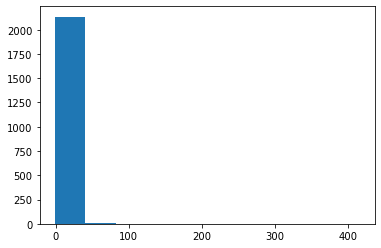

In [5]:
plt.hist(df3['return_perc_v2'])

In [6]:
df3['return_perc_v2'].describe()

count    2147.000000
mean        2.641324
std        13.568265
min        -1.000000
25%        -0.641474
50%         0.709365
75%         2.700253
max       415.564740
Name: return_perc_v2, dtype: float64

In [7]:
df_above_median_return = df3 [df3['return_perc_v2'] >= df3['return_perc_v2'].median()]
df_above_median_return

,primary_title,averagerating,numvotes,runtime_minutes,primary_name,genres,count,production_budget,domestic_gross,worldwide_gross,...,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller
1,10 Cloverfield Lane,7.2,260383.0,103.0,Dan Trachtenberg,"Drama,Horror,Mystery",1,5000000.0,72082999.0,1.082864e+08,...,0,0,0,1,0,1,0,0,0,0
3,12 Strong,6.6,50155.0,130.0,Nicolai Fuglsig,"Action,Drama,History",1,35000000.0,45819713.0,7.111838e+07,...,0,0,1,0,0,0,0,0,0,0
4,12 Years a Slave,8.1,577301.0,134.0,Steve McQueen,"Biography,Drama,History",1,20000000.0,56671993.0,1.810253e+08,...,0,0,1,0,0,0,0,0,0,0
5,127 Hours,7.6,323949.0,94.0,Danny Boyle,"Adventure,Biography,Drama",1,18000000.0,18335230.0,6.021717e+07,...,0,0,0,0,0,0,0,0,0,0
8,2 Guns,6.7,182025.0,109.0,Baltasar Kormákur,"Action,Comedy,Crime",1,61000000.0,75612460.0,1.324930e+08,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,Zambezia,5.8,6010.0,83.0,Wayne Thornley,"Adventure,Animation,Comedy",1,20000000.0,0.0,3.445434e+07,...,0,0,0,0,0,0,0,0,0,0
2138,Zero Dark Thirty,7.4,251072.0,157.0,Kathryn Bigelow,"Drama,Thriller",1,52500000.0,95720716.0,1.346124e+08,...,0,0,0,0,0,0,0,0,0,1
2141,Zookeeper,5.2,52396.0,102.0,Frank Coraci,"Comedy,Family,Romance",1,80000000.0,80360866.0,1.708055e+08,...,1,0,0,0,0,0,1,0,0,0
2144,Zootopia,8.0,1150338.0,108.0,"Byron Howard, Rich Moore, Jared Bush","Adventure,Animation,Comedy",3,150000000.0,341268248.0,1.019430e+09,...,0,0,0,0,0,0,0,0,0,0


In [8]:
np.corrcoef(df3['return_perc_v2'],df3['averagerating'])

array([[1.        , 0.01908782],
       [0.01908782, 1.        ]])

Again, no correlation between return percentages and ratings :(())

In [9]:
np.corrcoef(df_above_median_return['return_perc_v2'],df_above_median_return['averagerating'])

array([[ 1.        , -0.06135732],
       [-0.06135732,  1.        ]])

# Taking another approach, to see how return percentage correlates to genres:

In [10]:
# groupby genres
df3.groupby('genres')['return_perc_v2'].mean().sort_values(ascending=False).head(20)

genres
Biography,Documentary                                                              77.896018
Crime,Drama,Family, Documentary,Sport                                              62.119120
Horror,Thriller, Drama,Fantasy, Comedy,Romance,Sport, Drama, Action,Drama,Sport    54.792961
Action,Comedy,Drama                                                                45.883807
Horror,Mystery,Thriller                                                            30.213677
Drama,Mystery,Thriller, Drama,Horror,Mystery                                       28.761302
Horror,Thriller, Action,Horror,Thriller                                            27.571429
Horror,Thriller, Horror,Romance,Thriller, Comedy,Romance, Drama,Romance            26.179241
Horror, Drama,Fantasy,Mystery                                                      22.527273
Horror,Mystery,Thriller, Comedy,Drama,Romance                                      18.735563
Crime,Fantasy,Thriller                                         

In [11]:
df3.head()

,primary_title,averagerating,numvotes,runtime_minutes,primary_name,genres,count,production_budget,domestic_gross,worldwide_gross,...,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller
0,#Horror,3.0,3092.0,101.0,Tara Subkoff,"Crime,Drama,Horror",1,1500000.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,10 Cloverfield Lane,7.2,260383.0,103.0,Dan Trachtenberg,"Drama,Horror,Mystery",1,5000000.0,72082999.0,108286422.0,...,0,0,0,1,0,1,0,0,0,0
2,10 Days in a Madhouse,6.7,1114.0,111.0,Timothy Hines,Drama,1,12000000.0,14616.0,14616.0,...,0,0,0,0,0,0,0,0,0,0
3,12 Strong,6.6,50155.0,130.0,Nicolai Fuglsig,"Action,Drama,History",1,35000000.0,45819713.0,71118378.0,...,0,0,1,0,0,0,0,0,0,0
4,12 Years a Slave,8.1,577301.0,134.0,Steve McQueen,"Biography,Drama,History",1,20000000.0,56671993.0,181025343.0,...,0,0,1,0,0,0,0,0,0,0


#Looking into runtime and return percentage

In [12]:
df3['runtime_minutes'].describe()

count    2147.000000
mean      103.897140
std        18.212513
min         5.000000
25%        92.000000
50%       101.000000
75%       113.750000
max       180.000000
Name: runtime_minutes, dtype: float64

<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

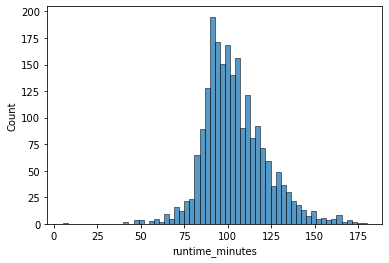

In [51]:
sns.histplot(x = df3['runtime_minutes'],bins=60)


<AxesSubplot:xlabel='runtime_minutes', ylabel='Count'>

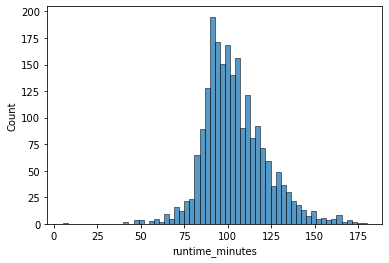

In [13]:
# looking at run time distribution
sns.histplot(x = df3['runtime_minutes'],bins=60)

<AxesSubplot:xlabel='runtime_minutes', ylabel='return_perc_v2'>

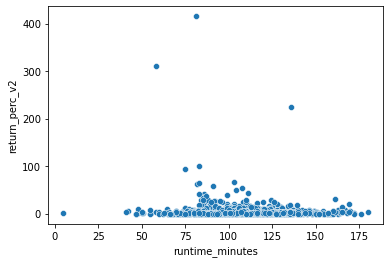

In [14]:
# looking to see a relationship bewteen run time and return percentage, scatterplot, linear regression...
sns.scatterplot(x='runtime_minutes', y= 'return_perc_v2', data = df3 )

<AxesSubplot:xlabel='runtime_minutes', ylabel='return_perc_v2'>

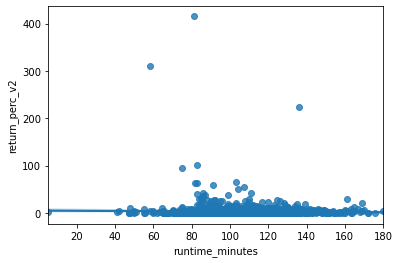

In [53]:
sns.regplot(x='runtime_minutes', y= 'return_perc_v2', data = df3)

In [15]:
np.corrcoef(df3['runtime_minutes'],df3['return_perc_v2'])

array([[ 1.       , -0.0267629],
       [-0.0267629,  1.       ]])

Binning movie lengths from 0 to 180 minutes, 10 min as the interval.

In [18]:
# Create a new column to store the movie length ranges
df3['movie_length_range'] = ''

# Define the movie length ranges
ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), 
          (60, 70), (70, 80), (80, 90), (90, 100), (100, 110), (110, 120), 
          (120, 130), (130, 140), (140, 150), (150, 160), (160, 170), (170, 180)]

# Iterate over the movie lengths and assign the appropriate range to the new column
for i, length in enumerate(df3['runtime_minutes']):
    for r in ranges:
        if r[0] <= length < r[1]:
            df3.loc[i, 'movie_length_range'] = f'{r[0]}_{r[1]}'
            break

In [19]:
df3.head()

,primary_title,averagerating,numvotes,runtime_minutes,primary_name,genres,count,production_budget,domestic_gross,worldwide_gross,...,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,movie_length_range
0,#Horror,3.0,3092.0,101.0,Tara Subkoff,"Crime,Drama,Horror",1,1500000.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,100_110
1,10 Cloverfield Lane,7.2,260383.0,103.0,Dan Trachtenberg,"Drama,Horror,Mystery",1,5000000.0,72082999.0,108286422.0,...,0,0,1,0,1,0,0,0,0,100_110
2,10 Days in a Madhouse,6.7,1114.0,111.0,Timothy Hines,Drama,1,12000000.0,14616.0,14616.0,...,0,0,0,0,0,0,0,0,0,110_120
3,12 Strong,6.6,50155.0,130.0,Nicolai Fuglsig,"Action,Drama,History",1,35000000.0,45819713.0,71118378.0,...,0,1,0,0,0,0,0,0,0,130_140
4,12 Years a Slave,8.1,577301.0,134.0,Steve McQueen,"Biography,Drama,History",1,20000000.0,56671993.0,181025343.0,...,0,1,0,0,0,0,0,0,0,130_140


In [20]:
df3['movie_length_range'].value_counts()

90_100     567
100_110    502
110_120    318
80_90      300
120_130    175
130_140    105
70_80       57
140_150     44
150_160     21
60_70       19
160_170     18
50_60        9
40_50        6
170_180      4
0_10         1
             1
Name: movie_length_range, dtype: int64

In [29]:
df3.groupby('movie_length_range')['return_perc_v2'].mean().sort_values()

movie_length_range
150_160     0.621691
60_70       0.814937
170_180     1.259047
0_10        1.698677
90_100      1.803671
110_120     1.824540
100_110     2.056958
40_50       2.496858
120_130     2.571524
140_150     2.693561
            2.898704
70_80       3.008662
80_90       4.334686
130_140     4.735438
160_170     6.353472
50_60      36.697040
Name: return_perc_v2, dtype: float64

In [24]:
df3.groupby('movie_length_range')['return_perc_v2'].median().sort_values()

movie_length_range
60_70     -0.418832
170_180   -0.043866
80_90     -0.005740
70_80      0.175320
90_100     0.259347
150_160    0.318634
110_120    0.729853
100_110    0.835556
40_50      1.346313
120_130    1.358951
130_140    1.577748
0_10       1.698677
140_150    2.118000
50_60      2.229761
           2.898704
160_170    3.750068
Name: return_perc_v2, dtype: float64

(array([820., 105., 867., 175.,  75.,  44.,  40.,   9.,  10.,   2.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

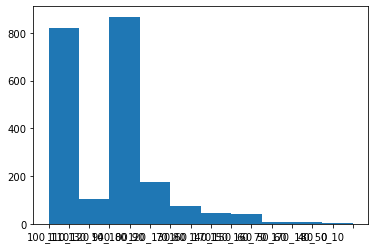

In [25]:
plt.hist(x=df3['movie_length_range'])

In [30]:
df3.to_csv('df3.csv')